In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.data_loader import load_all_genes, load_train_genes
from utils.dataset import get_final_split, HistoneDataset
from utils.histone_loader import HISTONE_MODS

In [2]:
def plot_histone_reads(genes, title):
    fig, ax = plt.subplots()

    lines = []
    for histone in HISTONE_MODS:
        x = HistoneDataset.get_x(genes, histones=[histone])
        x = x.reshape((x.shape[0], x.shape[2]))

        l = ax.plot(np.arange(50), x.sum(axis=0), label=histone)
        lines.append(l)

    ax.set_title(title)
    ax.set_ylabel('Mean value (log-scale)')
    ax.set_xlabel('Bins across TSS')
    ax.set_yscale('log')
    ax.legend(loc='upper left')
    plt.show()

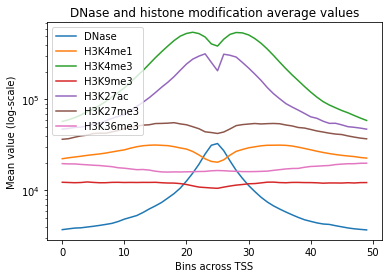

In [3]:
all_genes = load_all_genes()

plot_histone_reads(all_genes, 'DNase and histone modification average values')

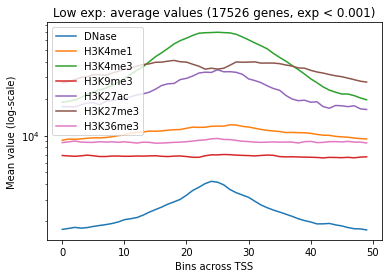

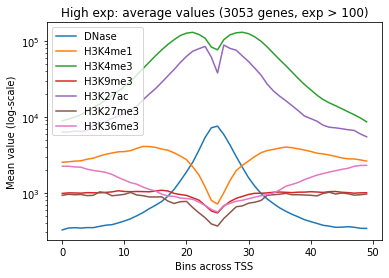

In [4]:
train_genes = load_train_genes()

low = train_genes[train_genes.gex < 0.001]
high = train_genes[train_genes.gex > 100]


plot_histone_reads(low, f'Low exp: average values ({len(low)} genes, exp < 0.001)')
plot_histone_reads(high, f'High exp: average values ({len(high)} genes, exp > 100)')